<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
!pip install lxml==4.6.4
!mamba install html5lib==1.1 -y
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-or

Download the webpage at the url


In [3]:
#your code goes here
data  = requests.get(url).text 

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"lxml") 

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table')
for row in table.find_all('tr'): 
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    Language_name = cols[1].getText() # store the value in column 3 as color_name
    annual_average_salary = cols[3].getText() # store the value in column 4 as color_code
    print("{}--->{}".format(Language_name,annual_average_salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes heretx
csvfile1=open('popular-languages3.csv','w+')
row1 = "Language, Average Annual Salary"
csvfile1.write(row1)
csvfile1=open('popular-languages3.csv','a')
for row in table.find_all('tr'): 
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    Language_name = cols[1].getText() # store the value in column 3 as color_name
    annual_average_salary = cols[3].getText() # store the value in column 4 as color_code
    csvfile1.write("\n{},{}".format(Language_name,annual_average_salary))
    csvfile1.seek(0)

In [7]:
file = open("popular-languages3.csv", "r")
print(file.read())
file.close()

Language, Average Annual Salary
Language,Average Annual Salary
Python,$114,383
Java,$101,013
R,$92,037
Javascript,$110,981
Swift,$130,801
C++,$113,865
C#,$88,726
PHP,$84,727
SQL,$84,793
Go,$94,082


In [41]:
L1 = []
L2 =[]
for row in table.find_all('tr'): 
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    Language_name = cols[1].getText() # store the value in column 3 as color_name
    annual_average_salary = cols[3].getText() 
    L1.append(Language_name )
    L2.append(annual_average_salary)
print (L1,L2)

['Language', 'Python', 'Java', 'R', 'Javascript', 'Swift', 'C++', 'C#', 'PHP', 'SQL', 'Go'] ['Average Annual Salary', '$114,383', '$101,013', '$92,037', '$110,981', '$130,801', '$113,865', '$88,726', '$84,727', '$84,793', '$94,082']


    Languages  Annual_Salaries
7         PHP            84727
8         SQL            84793
6          C#            88726
2           R            92037
9          Go            94082
1        Java           101013
3  Javascript           110981
5         C++           113865
0      Python           114383
4       Swift           130801


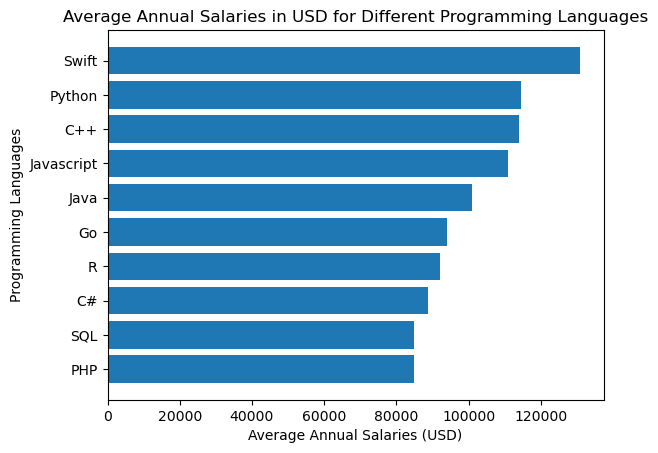

In [50]:
import matplotlib.pyplot as plt
import numpy as np
L3= L1[1:len(L1)]
x = L3
y = [114383, 101013, 92037, 110981, 130801, 113865, 88726, 84727, 84793, 94082]
df = pd.DataFrame(dict(Languages=L3,Annual_Salaries = y)).sort_values("Annual_Salaries", ascending = True)
print(df)
plt.barh(df["Languages"],df["Annual_Salaries"])
plt.xlabel("Average Annual Salaries (USD)")
plt.ylabel("Programming Languages")
plt.title("Average Annual Salaries in USD for Different Programming Languages")
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
